In [1]:
#import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [21]:
#load train.csv into a dataframe
train = pd.read_csv('data/train.csv')

#split the data into X and y
train_X = train.drop('Survived', axis=1)
train_y = train['Survived']

#show number of missing values in each column
train_X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


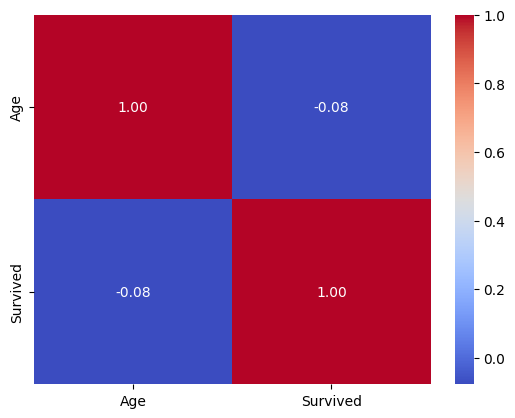

In [39]:
# Correlation matrix 
g = sns.heatmap(train[['Sex','Age','Survived']].corr(),annot=True,  fmt = ".2f", cmap = "coolwarm")

In [26]:
#replace missing values in Age column with the mean
X['Age'].fillna(X['Age'].mean(), inplace=True)

#replace missing values in Embarked column with the most frequent value
X['Embarked'].fillna(X['Embarked'].value_counts().idxmax(), inplace=True)

#drop Cabin column
X.drop('Cabin', axis=1, inplace=True)

In [19]:
X.drop('Name', axis=1, inplace=True)

In [20]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
#encore the data using one hot encoding
X = pd.get_dummies(X)

X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
#cross validation using KFold and LogisticRegression model from df
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(results.mean())

/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

0.7766666666666666


/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#cross validation using KFold and DecisionTreeClassifier model from df and then find the best parameters and fit the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_result = grid.fit(X, y)
print(grid_result.best_score_)
print(grid_result.best_params_)
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X, y)



0.8204744069912611
{'criterion': 'gini', 'max_depth': 3}


DecisionTreeClassifier(max_depth=3)

In [39]:
#use the model to predict the test.csv data
df_test = pd.read_csv('data/test.csv')

#predict the test data
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_test = pd.get_dummies(df_test)
df_test.head()

#predict the test data
y_pred = model.predict(df_test)

/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Name_Abbott, Master. Eugene Joseph
- Name_Abelseth, Miss. Karen Marie
- Name_Abelseth, Mr. Olaus Jorgensen
- Name_Abrahamsson, Mr. Abraham August Johannes
- Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)
- ...
Feature names seen at fit time, yet now missing:
- Name_Abbing, Mr. Anthony
- Name_Abbott, Mr. Rossmore Edward
- Name_Abbott, Mrs. Stanton (Rosa Hunt)
- Name_Abelson, Mr. Samuel
- Name_Abelson, Mrs. Samuel (Hannah Wizosky)
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 792 features, but DecisionTreeClassifier is expecting 1583 features as input.

In [32]:
#get the best model and its accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

LR: 0.776667 (0.048515)


/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/reno/Documents/REPOS/Kaggle/Titanic - Machine Learning from Disaster/venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 596, in fit
    self

LDA: nan (nan)
KNN: 0.638527 (0.049649)


KeyboardInterrupt: 